 ## General Assembly - 30th May 2017 ##

This notebook contains exercises for getting started with visualising data analysis in Python. The 3 main topics we will cover in this class are:
1. Reading in data from different sources
2. Manipulating data in Python
3. Visualising data in Python

### Reading in data from different sources
1. Reading in from a URL
2. Reading in from an excel spreadsheet
3. Reading in from a csv

In [35]:
# Load the Iris dataset from CSV URL
# 1. Import the required libraries
import numpy as np
import pandas as pd
import urllib

In [36]:
# 2. Specify the URL for the Iris dataset (UCI Machine Learning Repository)
url = "http://goo.gl/HppjFh"

# 3. Download the file
raw_data = urllib.request.urlopen(url)

# 4. Load the CSV file as a numpy matrix
#dataset = pd.read_csv(raw_data, delimiter=",")
dataset = pd.read_csv(raw_data, delimiter=",", names=('sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'))
print(dataset.shape)
dataset.head()

# Refer to http://pandas.pydata.org/pandas-docs/version/0.15.0/io.html#io-read-csv-table

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
# Read data from an excel spreadsheet
# 1. Load the file into python
xl = pd.ExcelFile("iris_saved.xlsx")
# 2. Find what sheets are in the workbook
xl.sheet_names

['Sheet1']

In [38]:
# 3. Read in the dataset from the 'Iris' sheet
df = xl.parse("Sheet1")
df.head()
#df.shape

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
# Bonus: To write the file to excel format we can use the 'to_excel' method
df.to_excel('iris_saved_v2.xlsx', sheet_name='Sheet1')

In [6]:
# Read data from a csv
iris_data = pd.read_csv('iris_saved.csv')
iris_data.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [12]:
#  To write the file to csv format we can use the 'to_csv' method
df.to_csv('iris_saved_2.csv')

### Manipulating Data in Python
In this section we will begin summarise the data and get an idea of the distribution of our data and what type of cleaning it requires. This is an essential step of a data science project

In [8]:
# Get a count of the number of rows in the DataFrame
len(iris_data.index)

150

In [7]:
iris_data.index

RangeIndex(start=0, stop=150, step=1)

In [14]:
# Get the dimensions of the DataFrame
iris_data.shape

(150, 6)

In [41]:
# Summarise the data
#iris_data.describe()
#iris_data.sepal_length.describe()
iris_data.isnull().sum()

Unnamed: 0      0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:
# Select only the observations with petal_length < 1.7
iris_data[(iris_data['petal_length']<1.7)]

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa
6,6,4.6,3.4,1.4,0.3,setosa
7,7,5.0,3.4,1.5,0.2,setosa
8,8,4.4,2.9,1.4,0.2,setosa
9,9,4.9,3.1,1.5,0.1,setosa
10,10,5.4,3.7,1.5,0.2,setosa


In [45]:
# Now let's group the data by the species
byspecies = iris_data.groupby('species')
byspecies.describe().petal_length
#type(byspecies)

species          
setosa      count    50.000000
            mean      1.464000
            std       0.173511
            min       1.000000
            25%       1.400000
            50%       1.500000
            75%       1.575000
            max       1.900000
versicolor  count    50.000000
            mean      4.260000
            std       0.469911
            min       3.000000
            25%       4.000000
            50%       4.350000
            75%       4.600000
            max       5.100000
virginica   count    50.000000
            mean      5.552000
            std       0.551895
            min       4.500000
            25%       5.100000
            50%       5.550000
            75%       5.875000
            max       6.900000
Name: petal_length, dtype: float64

In [11]:
# Apply a function by a group (Species)
# You can try mean, max, median, etc
byspecies['petal_length'].max()

species
setosa        1.9
versicolor    5.1
virginica     6.9
Name: petal_length, dtype: float64

In [12]:
# We can also aggregate by group (makes little sense in this context but this will come in handy)
byspecies['petal_length'].agg(np.sum)

species
setosa         73.2
versicolor    213.0
virginica     277.6
Name: petal_length, dtype: float64

In [13]:
# We can also aggregate by group (makes little sense in this context but this will come in handy)
byspecies['petal_length'].agg([len, np.mean, np.std])

,len,mean,std
species,,,
setosa,50.0,1.464,0.173511
versicolor,50.0,4.260,0.469911
virginica,50.0,5.552,0.551895


### Visualising data in Python
This Section will deal with visualising data in Python. We will cover different graph types and how to interpret them.

In [46]:
# Display the plots in the notebook with the following command
%matplotlib inline
# Import the graphing libraries we will use
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED3705EA58>]], dtype=object)

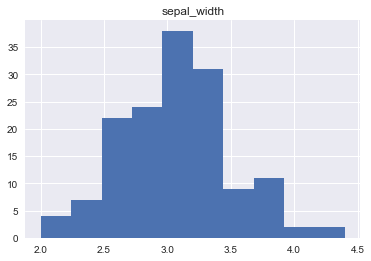

In [47]:
iris_data[['sepal_width']].hist()

In [23]:
# Install another Python library using pip
! pip install seaborn

In [48]:
import seaborn as sns
sns.set(color_codes=True)

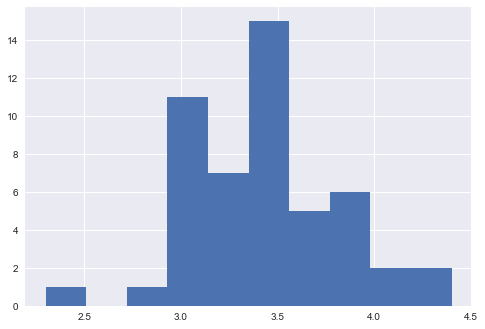

In [25]:
iris_data.loc[iris_data['species'] == 'setosa', 'sepal_width'].hist()

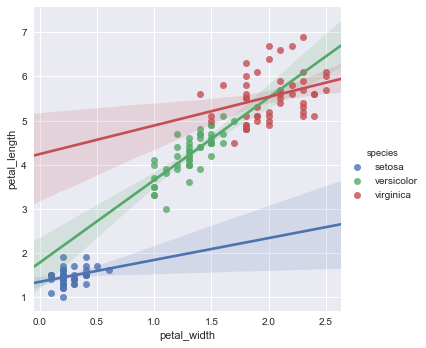

In [49]:
# Draw a Scatterplot showing sepal width and length
#sns.lmplot(x='sepal_width', y="sepal_length", hue="species", data=iris_data, fit_reg=True)
sns.lmplot(x='petal_width', y="petal_length", hue="species", data=iris_data, fit_reg=True)
#import matplotlib.pyplot as plt
#iris_data.plot(kind='scatter', x='sepal_width', y='sepal_length');
#plt.show()

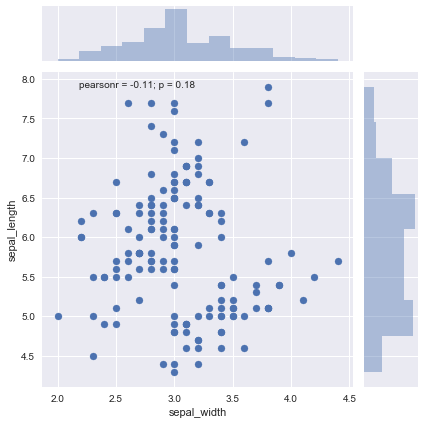

In [27]:
sns.jointplot(x="sepal_width", y="sepal_length", data=iris_data);

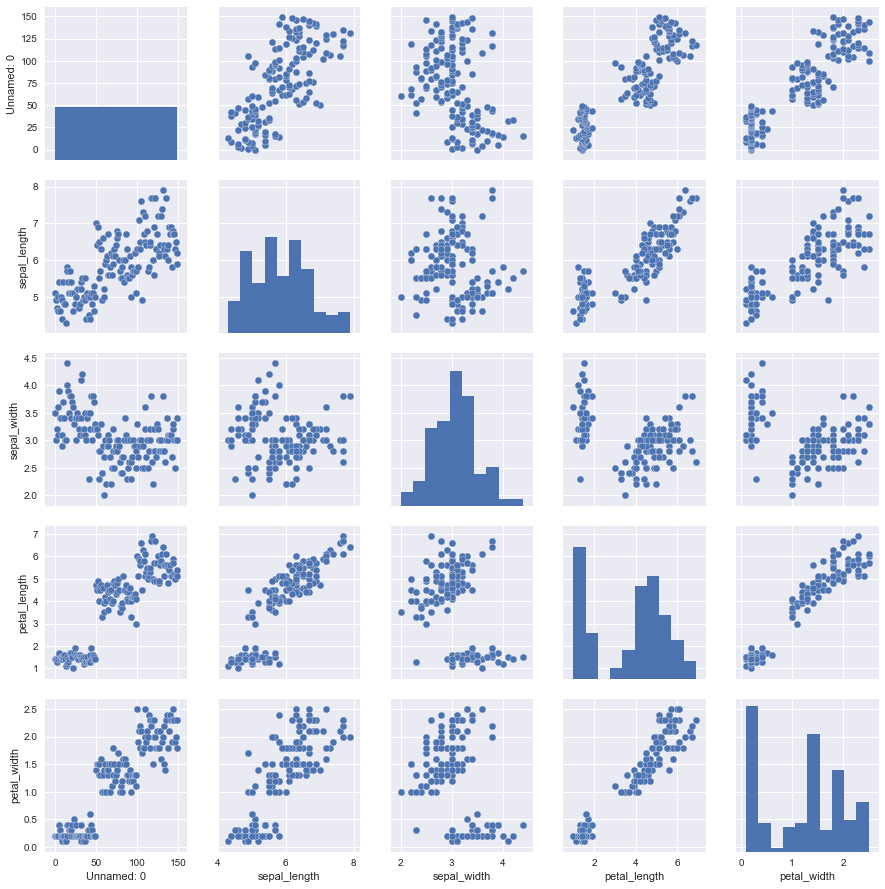

In [28]:
sns.pairplot(iris_data);

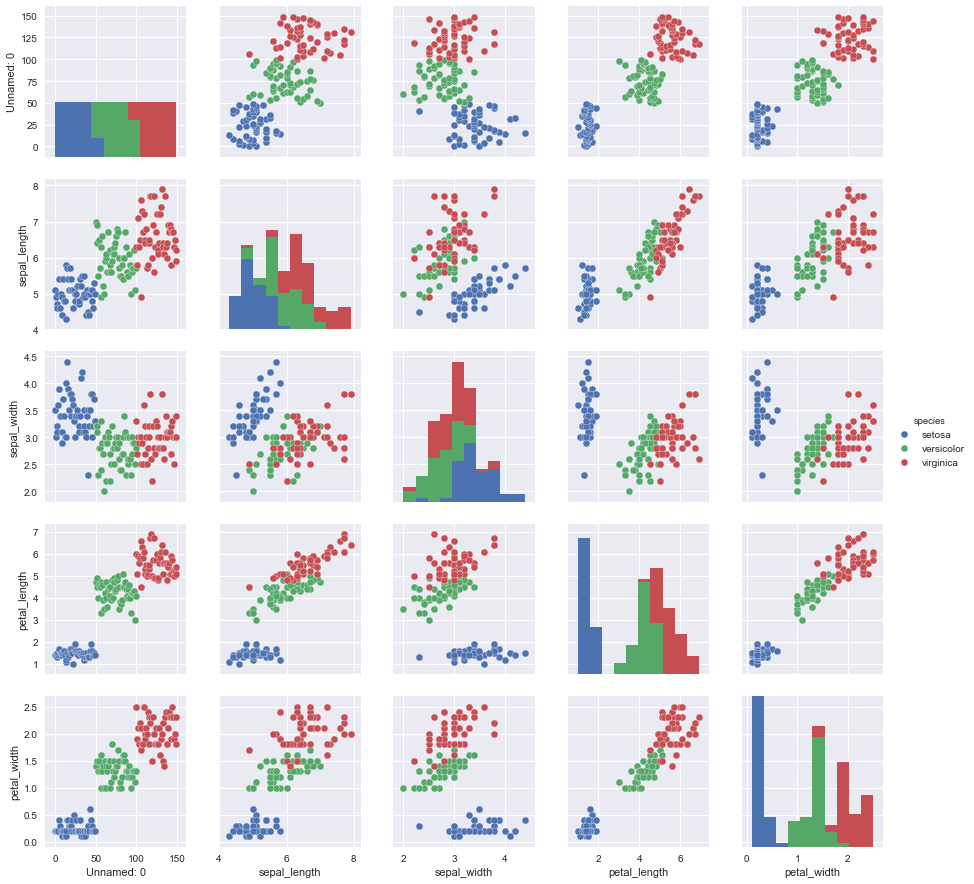

In [29]:
sns.pairplot(iris_data, hue='species');

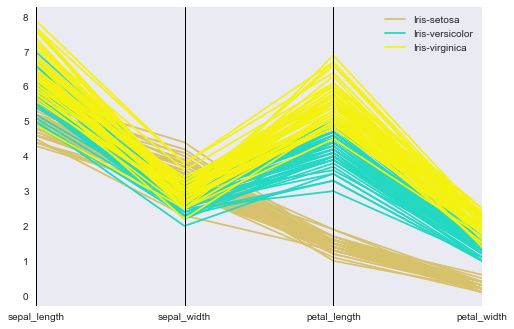

In [31]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates (dataset, 'species')

### Plotly
A nice open source library for interactive visualisations

In [14]:
# To run any command at the system shell, simply prefix it with !
# pip won't work from inside python without it
!pip install plotly --upgrade

Requirement already up-to-date: decorator>=4.0.6 in c:\anaconda\lib\site-packages (from plotly)
Requirement already up-to-date: nbformat>=4.2 in c:\anaconda\lib\site-packages (from plotly)
Requirement already up-to-date: pytz in c:\anaconda\lib\site-packages (from plotly)
Requirement already up-to-date: requests in c:\anaconda\lib\site-packages (from plotly)
Requirement already up-to-date: six in c:\anaconda\lib\site-packages (from plotly)
Requirement already up-to-date: traitlets>=4.1 in c:\anaconda\lib\site-packages (from nbformat>=4.2->plotly)
Requirement already up-to-date: ipython-genutils in c:\anaconda\lib\site-packages (from nbformat>=4.2->plotly)
Requirement already up-to-date: jupyter-core in c:\anaconda\lib\site-packages (from nbformat>=4.2->plotly)
Requirement already up-to-date: jsonschema!=2.5.0,>=2.4 in c:\anaconda\lib\site-packages (from nbformat>=4.2->plotly)
Requirement already up-to-date: certifi>=2017.4.17 in c:\anaconda\lib\site-packages (from requests->plotly)
Req

In [29]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

print(__version__) # requires version >= 1.9.0

2.0.9


In [34]:
import plotly
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)

plotly.offline.iplot({
    "data": [Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": Layout(title="hello world")
})

In [50]:
import plotly as py
import plotly.figure_factory as ff
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")

table = ff.create_table(df)
plotly.offline.iplot(table, filename='jupyter/table1')

In [51]:
import plotly.plotly as py
from plotly.graph_objs import *

data = [Bar(x=df.School,
            y=df.gap)]

plotly.offline.iplot(data, filename='jupyter/basic_bar')

In [52]:

import plotly.plotly as py
from plotly.graph_objs import *

trace_women = Bar(x=df.School,
                  y=df.Women,
                  name='Women',
                  marker=dict(color='#ffcdd2'))

trace_men = Bar(x=df.School,
                y=df.Men,
                name='Men',
                marker=dict(color='#A2D5F2'))

trace_gap = Bar(x=df.School,
                y=df.gap,
                name='Gap',
                marker=dict(color='#59606D'))

data = [trace_women, trace_men, trace_gap]
layout = Layout(title="Average Earnings for Graduates",
                xaxis=dict(title='School'),
                yaxis=dict(title='Salary (in thousands)'))
fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, filename='jupyter/styled_bar')

In [53]:
# Scatter plot with heatmap
import matplotlib.pyplot as plt
x = np.random.randn(2000)
y = np.random.randn(2000)
plotly.offline.iplot([Histogram2dContour(x=x, y=y, contours=Contours(coloring='heatmap')),
       Scatter(x=x, y=y, mode='markers', marker=Marker(color='white', size=3, opacity=0.3))], show_link=False)

In [54]:
# Mapping
df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()

df_flight_paths = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_aa_flight_paths.csv')
df_flight_paths.head()

airports = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_airports['long'],
        lat = df_airports['lat'],
        hoverinfo = 'text',
        text = df_airports['airport'],
        mode = 'markers',
        marker = dict(
            size=2,
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]

flight_paths = []
for i in range( len( df_flight_paths ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ df_flight_paths['start_lon'][i], df_flight_paths['end_lon'][i] ],
            lat = [ df_flight_paths['start_lat'][i], df_flight_paths['end_lat'][i] ],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'red',
            ),
            opacity = float(df_flight_paths['cnt'][i])/float(df_flight_paths['cnt'].max()),
        )
    )

layout = dict(
        title = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
        showlegend = False,
        height = 800,
        geo = dict(
            scope='north america',
            projection=dict( type='azimuthal equal area' ),
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )

fig = dict( data=flight_paths + airports, layout=layout )

plotly.offline.iplot(fig)